In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [235]:
opentable= pd.read_csv('opentablecleaned.csv')

In [236]:
opentable.sort_values('promoted',ascending = False).head()

,Unnamed: 0,area,cost,cuisine,link,location,location_on_page,name,promoted,rating,review_count,review_link
98635,98635,"Washington, D.C. Area",2,American,https://www.opentable.com/r/cheesetique-mosaic...,Fairfax,"[11, 0]",Cheesetique - Mosaic,True,4.5,195.0,https://www.opentable.com/r/cheesetique-mosaic...
127713,127713,Dallas - Fort Worth,3,American,https://www.opentable.com/r/table-13-addison?a...,North Dallas / Addison,"[4, 0]",Table 13,True,4.6,1943.0,https://www.opentable.com/r/table-13-addison?a...
58440,58440,New York / Tri-State Area,3,American,https://www.opentable.com/r/perrine-new-york?a...,Upper East Side,"[12, 5]",Perrine,True,4.4,373.0,https://www.opentable.com/r/perrine-new-york?a...
58439,58439,New York / Tri-State Area,4,Steakhouse,https://www.opentable.com/r/bobs-steak-and-cho...,Midtown East,"[12, 4]",Bob's Steak & Chop House - New York,True,4.5,250.0,https://www.opentable.com/r/bobs-steak-and-cho...
53641,53641,New York / Tri-State Area,3,Steakhouse,https://www.opentable.com/r/ruths-chris-steak-...,Jersey City,"[60, 6]",Ruth's Chris Steak House - Jersey City,True,4.5,260.0,https://www.opentable.com/r/ruths-chris-steak-...


In [237]:
opentable.isna().sum()

Unnamed: 0               0
area                   100
cost                     0
cuisine                  0
link                     0
location                 0
location_on_page         0
name                     0
promoted                 0
rating              121707
review_count        120693
review_link              0
dtype: int64

In [238]:
#without links
ot = opentable[['area','location','name','cuisine','cost','rating','review_count','promoted','location_on_page']]
ot.head()

,area,location,name,cuisine,cost,rating,review_count,promoted,location_on_page
0,Atlanta / Georgia,Airport / College Park,Spice House on Cascade,Caribbean,2,NaN,NaN,False,"[61, 0]"
1,Atlanta / Georgia,Augusta,TBonz Steakhouse-Augusta,Italian,3,NaN,1.0,False,"[61, 1]"
2,Atlanta / Georgia,Lilburn,Royal Restaurant and Sweets,Mediterranean,3,NaN,NaN,False,"[61, 2]"
3,Atlanta / Georgia,Smyrna,Bollywood Zing,Italian,3,NaN,NaN,False,"[61, 3]"
4,Atlanta / Georgia,Buckhead,Sushi Bar Yu-Ka,Steakhouse,3,NaN,NaN,False,"[61, 4]"


In [239]:
len(ot)

163813

In [7]:
rating_without_reviews = ot.rating.isna().sum() - ot.review_count.isna().sum()
rating_without_reviews

1021

In [8]:
percent_missing_rating = str(round(((ot.rating.isna().sum()/len(ot))*100),2)) +'%'
percent_missing_rating 

'74.29%'

# Scatter Plots

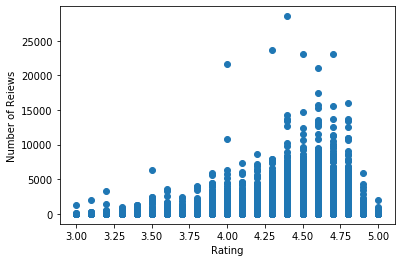

<Figure size 800x800 with 0 Axes>

In [99]:
plt.scatter(y = ot.review_count, x =ot.rating)
plt.title('Rating ')
plt.xlabel('Rating')
plt.ylabel('Number of Reiews')
plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.show()

# Groupings
## Grouped by area

In [9]:
grouped_area_size = pd.DataFrame(ot.groupby('area').size(),columns = ['restaurant_count'])

In [10]:
grouped_area_size

,restaurant_count
area,
Atlanta / Georgia,6104
Atlantic Canada,1069
Baja California Sur,167
Barcelona,966
Berlin,1698
Boston / New England,10000
Calgary / Southern Alberta,1458
Cancun / Riviera Maya,364
Chicago / Illinois,10000


In [11]:
grouped_area_size.sort_values('restaurant_count',ascending = False).head(10)

,restaurant_count
area,
Los Angeles,10000
Chicago / Illinois,10000
New York / Tri-State Area,10000
Boston / New England,10000
Philadelphia / New Jersey Suburbs,8681
San Francisco Bay Area,8499
Toronto / Ontario,7412
Seattle / Eastern Washington,6247
Atlanta / Georgia,6104


## Grouped by location

In [12]:
grouped_location_size = pd.DataFrame(ot.groupby('location').size(),columns = ['restaurant_count'])

In [13]:
len(grouped_location_size)

3831

In [14]:
grouped_location_size.sort_values('restaurant_count', ascending = False).head(10)

,restaurant_count
location,
Downtown,2599
Sooke,1211
Detroit,1135
Richmond,893
Milwaukee,686
Arlington,632
Calgary,624
Montreal,590
Bronx,575


## Grouped by cost

In [15]:
grouped_cost_size = pd.DataFrame(ot.groupby('cost').size(),columns = ['restaurant_count'])

In [16]:
grouped_cost_size

,restaurant_count
cost,
2,138849
3,19753
4,5186


In [104]:
grouped_cost = ot.groupby('cost')

In [110]:
grouped_cost.agg(['mean','sum','count'])

rating                  review_count                    promoted  \
          mean       sum  count         mean        sum  count      mean   
cost                                                                       
2     4.250680  121254.9  28526   275.971814  8106948.0  29376  0.001030   
3     4.376160   45927.8  10495   682.853945  7260786.0  10633  0.005974   
4     4.494264   13869.3   3086   840.009939  2619991.0   3119  0.010220   

                     
        sum   count  
cost                 
2     143.0  138849  
3     118.0   19753  
4      53.0    5186

In [114]:
grouped_cost.mean()

,rating,review_count,promoted
cost,,,
2,4.250680,275.971814,0.001030
3,4.376160,682.853945,0.005974
4,4.494264,840.009939,0.010220


In [120]:
grouped_cost.rating.mean()

cost
2    4.250680
3    4.376160
4    4.494264
Name: rating, dtype: float64

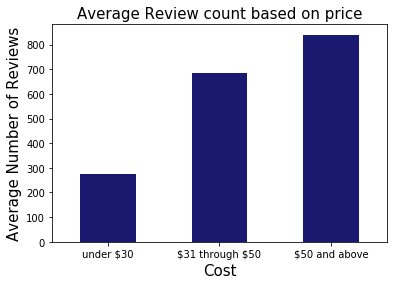

<Figure size 720x720 with 0 Axes>

In [159]:
grouped_cost.review_count.mean().plot.bar(color = 'midnightblue')
plt.xticks([0,1,2],labels= ['under \$30','\$31 through \$50','\$50 and above'],rotation = 0)
plt.title('Average Review count based on price',fontsize = 15)
plt.xlabel('Cost',fontsize = 15)
plt.ylabel('Average Number of Reviews',fontsize = 15)
plt.figure(figsize = (10,10))
plt.show()

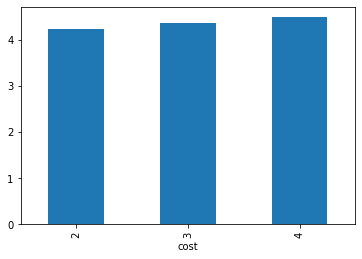

In [123]:
grouped_cost.rating.mean().plot.bar()

In [ ]:
plt.bar(x = grouped_cost.rating.mean(), height = )

## Group by promoted

In [17]:
grouped_promoted_size = pd.DataFrame(ot.groupby('promoted').size(),columns = ['restaurant_count'])

In [18]:
grouped_promoted_size

,restaurant_count
promoted,
False,163474
True,314


In [67]:
promoted_grouped = ot.groupby('promoted')

In [68]:
for key, values in promoted_grouped:
    print(key) #this indicates the grouping
    print('-'*70)
    print(values) #this is a dataframe for that 
    print('\n')

False
----------------------------------------------------------------------
                     area                location  \
0       Atlanta / Georgia  Airport / College Park   
1       Atlanta / Georgia                 Lilburn   
2       Atlanta / Georgia                  Smyrna   
3       Atlanta / Georgia                Buckhead   
4                   Essex                  Ilford   
...                   ...                     ...   
163783        Los Angeles                Downtown   
163784        Los Angeles               Hollywood   
163785        Los Angeles            Mid-Wilshire   
163786        Los Angeles               Hollywood   
163787        Los Angeles            Mid-Wilshire   

                               name        cuisine  cost  rating  \
0            Spice House on Cascade      Caribbean     2     NaN   
1       Royal Restaurant and Sweets  Mediterranean     3     NaN   
2                    Bollywood Zing        Italian     3     NaN   
3             

In [83]:
promoted_grouped.groups

{False: Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                  8,      9,
             ...
             163778, 163779, 163780, 163781, 163782, 163783, 163784, 163785,
             163786, 163787],
            dtype='int64', length=163474),
 True: Int64Index([  2112,   2312,   2412,   2612,   2712,   2714,   3312,   3316,
               3712,   3812,
             ...
             138890, 138893, 147688, 147690, 147788, 147790, 147793, 148688,
             148691, 161788],
            dtype='int64', length=314)}

In [87]:
idx = pd.IndexSlice
promoted_grouped.loc[idx['True'], :]

AttributeError: Cannot access callable attribute 'loc' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [57]:
promoted_avg = grouped_promoted.mean()
promoted_avg

,cost,rating,review_count
promoted,,,
False,2.182910,4.299251,415.008221
True,2.713376,4.375081,702.912903


In [58]:
promoted_avg.plot.bar(x= ,y = 'cost', rot=0)

NameError: name 'promoted' is not defined

## Group by area and then location

In [161]:
grouped_area_location = ot.groupby(['area','location'])

In [162]:
grouped_area_location.mean()

cost    rating  review_count  \
area              location                                                   
Atlanta / Georgia Acworth                 2.046729  4.750000    567.000000   
                  Airport / College Park  2.088235  4.137500    216.812500   
                  Alpharetta              2.193103  4.252941    717.134615   
                  Athens                  2.217391  4.133333      1.000000   
                  Augusta                 2.074830  4.388000    333.566667   
...                                            ...       ...           ...   
Yorkshire         Wetherby                2.000000  4.400000     12.000000   
                  Whitby                  2.384615  4.372727    186.545455   
                  Woodlesford             4.000000  3.600000      6.000000   
                  Yarm                    2.090909  4.409091    177.181818   
                  York                    2.179688  4.164423    142.261261   

                                          promoted  
area              location                          
Atlanta / Georgia Acworth                      0.0  
                  Airport / College Park       0.0  
                  Alpharetta                   0.0  
                  Athens                       0.0  
                  Augusta                      0.0  
...                                            ...  
Yorkshire         Wetherby                     0.0  
                  Whitby                       0.0  
                  Woodlesford                  0.0  
                  Yarm                         0.0  
                  York                         0.0  

[4092 rows x 4 columns]

## group by cuisine

In [187]:
grouped_cuisine = ot.groupby('cuisine')

In [186]:
grouped_cuisine_size = pd.DataFrame(ot.groupby('cuisine').size(),columns = ['restaurant_count']) > 50

In [192]:
grouped_cuisine_size['restaurant_count']

cuisine
Afghan           False
African           True
Afternoon Tea     True
American          True
Argentinean       True
                 ...  
Wine Bar          True
Winery           False
Yakiniku          True
Yakitori         False
Yoshoku          False
Name: restaurant_count, Length: 237, dtype: bool

In [232]:
cuisine_rating = grouped_cuisine.rating.agg(['count','mean'])
cuisine_rating = cuisine_rating.sort_values('count',ascending = False)
cuisine_rating = cuisine_rating['mean'].head(10)

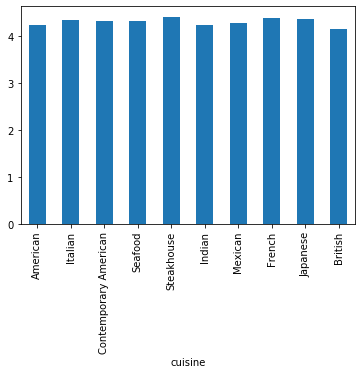

In [233]:
cuisine_rating.plot.bar()

# New York